In [76]:
import cv2
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def face_cascade(name='lbp'):
    xml_path = {
        'lbp': 'opencv-files/lbpcascade_frontalface.xml',
        'haar': 'opencv-files/haarcascade_frontalface_alt.xml'
    }[name]
    return cv2.CascadeClassifier(xml_path)

def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def detect_face(img):
    gray = to_gray(img)
    fc = face_cascade('lbp')

    faces = fc.detectMultiScale(gray, scaleFactor=2.0, minNeighbors=2)
    # where face is "rect" - (x, y, w, h)

    result = []
    for face in faces:
        (x, y, w, h) = face
        result.append((gray[y:y+w, x:x+h], face))
    
    # [(grayImg, rect), ...]
    return result


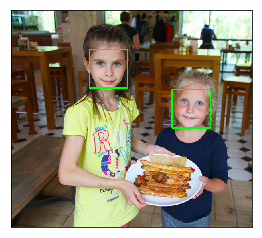

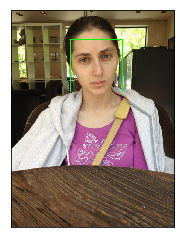

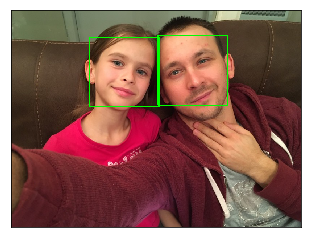

FileNotFoundError: [Errno 2] No such file or directory: '/home/test-data/testJulia_3faces.jpg'

In [78]:
img_path_list = [
    'test-data/test_Diana.jpg',
    'test-data/test5.jpg',
    'test-data/testAnton_Di.jpg',
    'test-data/testJulia_3faces.jpg'
]

for img_path in img_path_list:
    img_path = os.path.abspath(img_path)
#     img = cv2.imread(img_path)
    
    img = mpimg.imread(img_path)
    
#     plt.imshow(img)
#     plt.colorbar()
#     plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#     plt.show()

    faces = detect_face(img)

    for item in faces:
        imgFace = item[0]
        draw_rectangle(img, item[1])
        
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()